## Venezuela similarity

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocess_functions import preprocess
import unidecode

def cos_similarity(textlist):
    TfidfVec = TfidfVectorizer()
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [38]:
# preprocess english national report
with open('../data/vz/vz_national_report_eng.txt','r') as f:
    vz_national_eng = f.read()
vz_national_stems_eng = preprocess(unidecode.unidecode(vz_national_eng), language='english')[0]

# preprocess spanish national report
with open('../data/vz/vz_national_report_spa.txt','r') as f:
    vz_national_spa = f.read()
vz_national_stems_spa = preprocess(unidecode.unidecode(vz_national_spa), language='spanish')[0]

In [39]:
# read NGO reports
vz_ngos_stems = pd.read_csv('../data/vz/vz_ngos_stems.csv')
vz_ngos_spa = list(vz_ngos_stems.loc[vz_ngos_stems['language']=='spanish','text_p'])
vz_ngos_eng = list(vz_ngos_stems.loc[vz_ngos_stems['language']=='english','text_p'])

# append report and NGOs together
vz_docs_spa = [vz_national_stems_spa]
vz_docs_spa = vz_docs_spa + vz_ngos_spa

vz_docs_eng = [vz_national_stems_eng]
vz_docs_eng = vz_docs_eng + vz_ngos_eng

In [40]:
# get similarities
vz_simil_spa = cos_similarity(vz_docs_spa)[1:,0]
vz_simil_eng = cos_similarity(vz_docs_eng)[1:,0]
vz_simil = vz_ngos_stems[['ngo_name', 'language']]
vz_simil.loc[vz_simil['language']=='spanish', 'simil'] = vz_simil_spa
vz_simil.loc[vz_simil['language']=='english', 'simil'] = vz_simil_eng

/Users/giacomomason/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giacomomason/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ngo_name,language,simil
0,AC - Agora Constitucional,spanish,0.191760
1,ACC - Asociación Clara Campoamor,spanish,0.262520
2,ACCESO -Acceso Justicia,spanish,0.229646
3,ACCR - Asociación Colectivo Colombianos Refugi...,spanish,0.165792
4,ACD11 - Asociación Comunitaria Distrito 11,spanish,0.225833


In [43]:
vz_simil['country'] = 'vz'
vz_simil.head()
vz_simil.to_csv('../data/vz/vz_simil.csv')

/Users/giacomomason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Cuba similarity

In [53]:
# preprocess english national report
with open('../data/cu/cu_national_report_eng.txt','r') as f:
    cu_national_eng = f.read()
cu_national_stems_eng = preprocess(unidecode.unidecode(cu_national_eng), language='english')[0]

# preprocess spanish national report
with open('../data/cu/cu_national_report_spa.txt','r') as f:
    cu_national_spa = f.read()
cu_national_stems_spa = preprocess(unidecode.unidecode(cu_national_spa), language='spanish')[0]

# preprocess french national report
with open('../data/cu/cu_national_report_fre.txt','r') as f:
    cu_national_fre = f.read()
cu_national_stems_fre = preprocess(unidecode.unidecode(cu_national_fre), language='french')[0]

In [54]:
# read NGO reports
cu_ngos_stems = pd.read_csv('../data/cu/cu_ngos_stems.csv')
cu_ngos_stems.dropna(how='any', axis=0, inplace=True)
cu_ngos_spa = list(cu_ngos_stems.loc[cu_ngos_stems['language']=='spanish','text_p'])
cu_ngos_eng = list(cu_ngos_stems.loc[cu_ngos_stems['language']=='english','text_p'])
cu_ngos_fre = list(cu_ngos_stems.loc[cu_ngos_stems['language']=='french','text_p'])

# append report and NGOs together
cu_docs_spa = [cu_national_stems_spa]
cu_docs_spa = cu_docs_spa + cu_ngos_spa
cu_docs_eng = [cu_national_stems_eng]
cu_docs_eng = cu_docs_eng + cu_ngos_eng
cu_docs_fre = [cu_national_stems_fre]
cu_docs_fre = cu_docs_fre + cu_ngos_fre

In [55]:
# get similarities
cu_simil_spa = cos_similarity(cu_docs_spa)[1:,0]
cu_simil_eng = cos_similarity(cu_docs_eng)[1:,0]
cu_simil_fre = cos_similarity(cu_docs_fre)[1:,0]
cu_simil = cu_ngos_stems[['ngo_name', 'language']]
cu_simil.loc[cu_simil['language']=='spanish', 'simil'] = cu_simil_spa
cu_simil.loc[cu_simil['language']=='english', 'simil'] = cu_simil_eng
cu_simil.loc[cu_simil['language']=='french', 'simil'] = cu_simil_fre

/Users/giacomomason/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giacomomason/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
cu_simil['country'] = 'cu'
cu_simil.head()
cu_simil.to_csv('../data/cu/cu_simil.csv')

/Users/giacomomason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## UK similarities

In [57]:
# preprocess english national report
with open('../data/uk/uk_national_report_eng.txt','r') as f:
    uk_national_eng = f.read()
uk_national_stems_eng = preprocess(unidecode.unidecode(uk_national_eng), language='english')[0]

In [58]:
# read NGO reports
uk_ngos_stems = pd.read_csv('../data/uk/uk_ngos_stems.csv')
uk_ngos_eng = list(uk_ngos_stems.loc[uk_ngos_stems['language']=='english','text_p'])

# append report and NGOs together
uk_docs_eng = [uk_national_stems_eng]
uk_docs_eng = uk_docs_eng + uk_ngos_eng

In [59]:
# get similarities
uk_simil_eng = cos_similarity(uk_docs_eng)[1:,0]
uk_simil = uk_ngos_stems[['ngo_name', 'language']]
uk_simil.loc[uk_simil['language']=='english', 'simil'] = uk_simil_eng

/Users/giacomomason/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giacomomason/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
uk_simil['country'] = 'uk'
uk_simil.head()
uk_simil.to_csv('../data/uk/uk_simil.csv')

/Users/giacomomason/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### append data

In [62]:
all_simil = pd.concat([uk_simil, vz_simil, cu_simil])

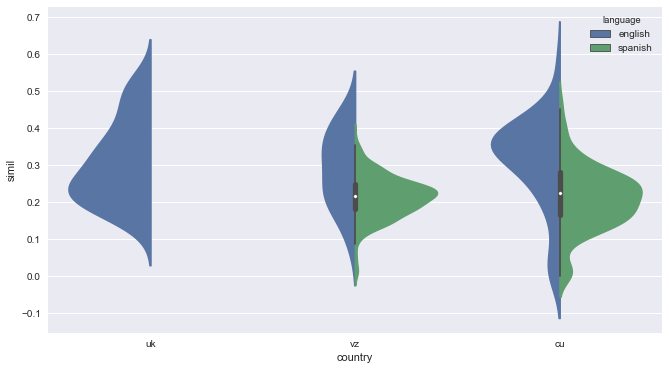

In [86]:
plt.subplots(figsize=(11,6))
sns.violinplot(x="country", y="simil", hue="language", data=all_simil.loc[all_simil['language']!='french'], split=True)
plt.savefig('../plots/violin.png')
plt.show()

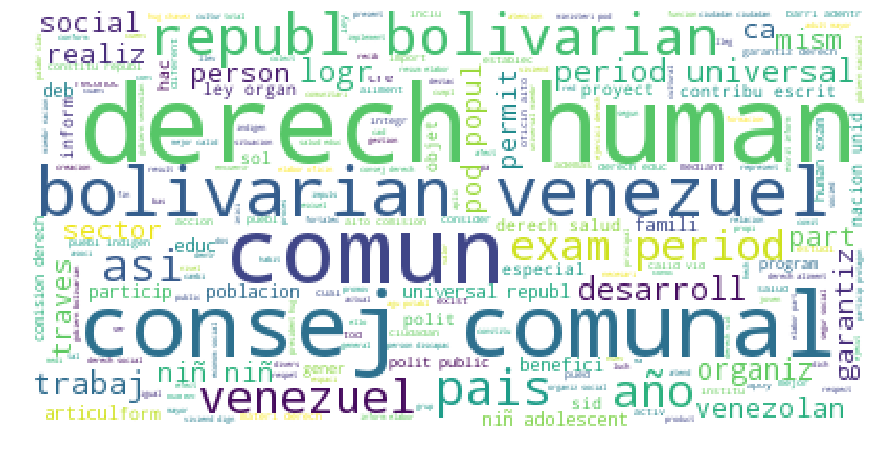

In [84]:
# venezuela NGO spanish
from wordcloud import WordCloud
wcloud = WordCloud(background_color='white').generate(' '.join(vz_ngos_spa))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wcloud)
plt.savefig('../plots/vz_spa.png')
plt.show()

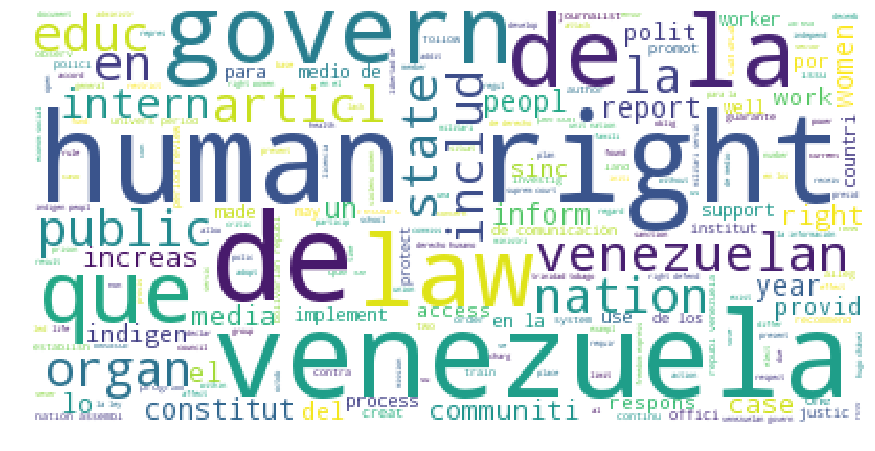

In [83]:
wcloud = WordCloud(background_color='white').generate(' '.join(vz_ngos_eng))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wcloud)
plt.savefig('../plots/vz_eng.png')
plt.show()

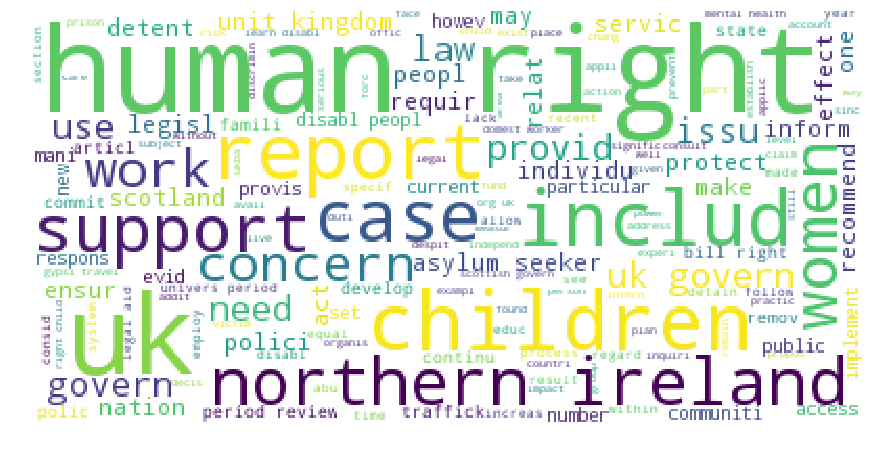

In [82]:
wcloud = WordCloud(background_color='white').generate(' '.join(uk_ngos_eng))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wcloud)
plt.savefig('../plots/uk_eng.png')
plt.show()

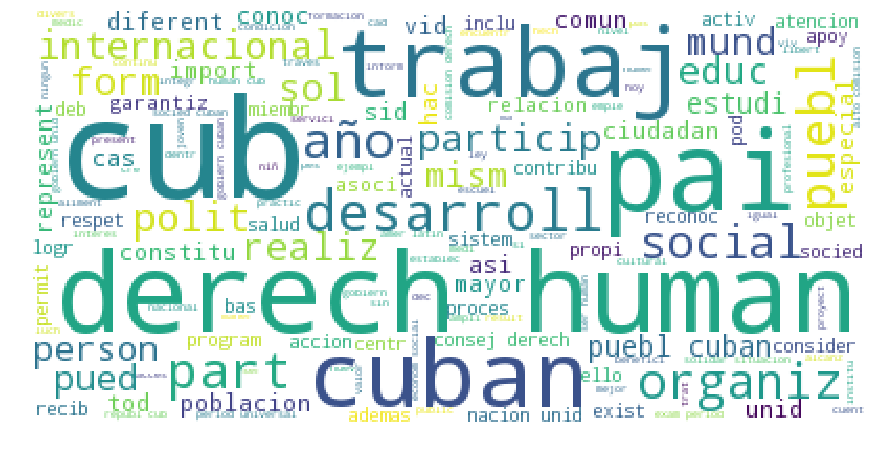

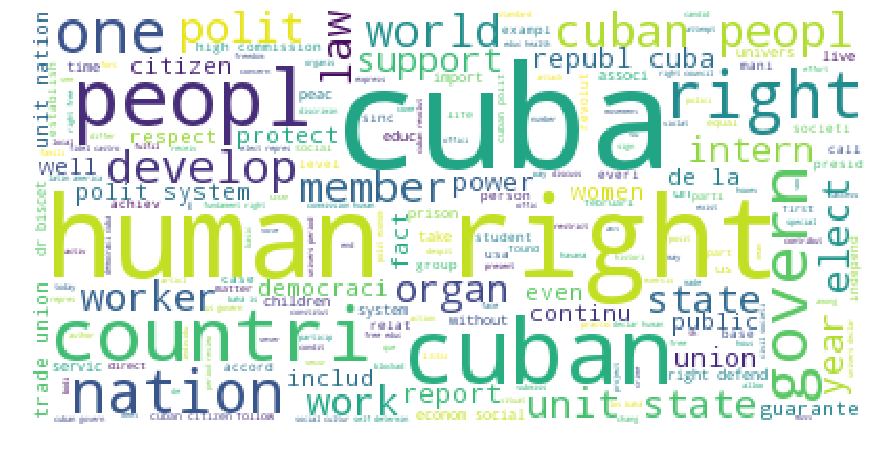

In [81]:
wcloud = WordCloud(background_color='white').generate(' '.join(cu_ngos_eng))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wcloud)
plt.savefig('../plots/cu_eng.png')
plt.show()

In [80]:
wcloud = WordCloud(background_color='white').generate(' '.join(cu_ngos_spa))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wcloud)
plt.savefig('../plots/cu_spa.png')
plt.show()

In [ ]:
all_simil